# Assignment 8
## Applied Machine Learning

Andrew Chan 
EBE869

This assignment assumes that `assignment08_dataset.csv` is in the same directory as this notebook.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

# Locate and load the data file
df_train = pd.read_csv('assignment08_dataset.csv')


In [3]:
df_train

,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937
...,...,...
745,0.505927,1.213927
746,-1.640461,-0.469973
747,-0.057139,-0.909261
748,-1.169394,0.039597


In [6]:
type(df_train['f1'][0])

numpy.float64

In [7]:
X = df_train.values

In [8]:
X.shape

(750, 2)

# 1. [10 pts] How many species must be there in the dataset?
(For the rest of this assignment, use that number as the number-of-clusters parameter in methods such as KMeans)

centroids [[-1.25046574 -0.67198973]
 [ 0.67135661  0.36078137]]


Text(0.5, 1.0, 'Trying 2 clusters')

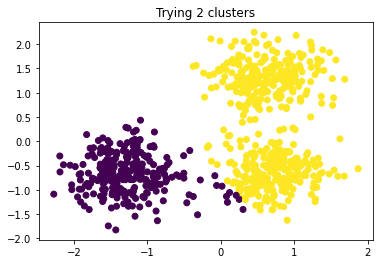

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
print('centroids', kmeans.cluster_centers_)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Trying 2 clusters")

centroids [[-1.30266211 -0.65704205]
 [ 0.62260555  1.3172598 ]
 [ 0.6954587  -0.64442334]]


Text(0.5, 1.0, 'Trying 3 clusters')

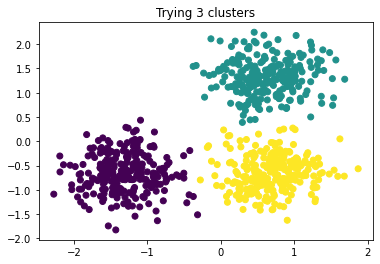

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
print('centroids', kmeans.cluster_centers_)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Trying 3 clusters")

# Answer: 3 clusters